In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [2]:
x_train, y_train, x_test, y_test = ([] for x in range(4))

In [3]:
def convert(x):
    return bin(x)[2:].zfill(40)

In [4]:
with open('../src/data_train.txt','r') as pixels, open('../src/label_train.txt','r') as labels:
    for l in pixels.readlines():
        l1 = map(int, l.split())
        l2 = list(map(convert, l1))
        px = list(map(int,''.join(l2)))
        lb = int(labels.readline())
        x_train.append(px)
        y_train.append(lb)
with open('../src/data_test.txt','r') as pixels, open('../src/label_test.txt','r') as labels:
    for l in pixels.readlines():
        l1 = map(int, l.split())
        l2 = list(map(convert, l1))
        px = list(map(int,''.join(l2)))
        lb = int(labels.readline())
        x_test.append(px)
        y_test.append(lb)
print(len(x_train),len(y_train),len(x_test),len(y_test))

60000 60000 10000 10000


In [5]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [6]:
train_count, features = x_train.shape
test_count = x_test.shape[0]

In [165]:
# first model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(1600,)))
model.add(Dropout(rate=0.1))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 128)               204928    
                                                                 
 dropout_37 (Dropout)        (None, 128)               0         
                                                                 
 dense_86 (Dense)            (None, 64)                8256      
                                                                 
 dropout_38 (Dropout)        (None, 64)                0         
                                                                 
 dense_87 (Dense)            (None, 10)                650       
                                                                 
Total params: 213,834
Trainable params: 213,834
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
47/47 [==============================] - 2s 33ms/step - loss: 0.0142 - accuracy: 0.9952 - val_loss: 0.1053 - val_accuracy: 0.9751
Epoch 2/100
47/47 [==============================] - 1s 25ms/step - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.1085 - val_accuracy: 0.9736
Epoch 3/100
47/47 [==============================] - 1s 23ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.1087 - val_accuracy: 0.9751
Epoch 4/100
47/47 [==============================] - 1s 24ms/step - loss: 0.0126 - accuracy: 0.9961 - val_loss: 0.1081 - val_accuracy: 0.9757
Epoch 5/100
47/47 [==============================] - 1s 28ms/step - loss: 0.0122 - accuracy: 0.9961 - val_loss: 0.1038 - val_accuracy: 0.9761
Epoch 6/100
47/47 [==============================] - 1s 27ms/step - loss: 0.0110 - accuracy: 0.9967 - val_loss: 0.1072 - val_accuracy: 0.9752
Epoch 7/100
47/47 [==============================] - 1s 26ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.1127 - val_accuracy: 0.9749
Epoch 

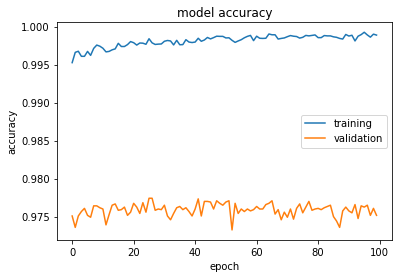

Test loss: 0.144
Test accuracy: 0.978


In [167]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=1024, epochs=100, shuffle=True, validation_split=.2)
loss, accuracy  = model.evaluate(x_test, y_test, batch_size=1024)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [40]:
wList = model.get_weights()
wList[1] = np.reshape(wList[1], (1, wList[1].shape[0]))
wList[3] = np.reshape(wList[3], (1, wList[3].shape[0]))
wList[0].shape, wList[1].shape, wList[2].shape, wList[3].shape

((1600, 128), (1, 128), (128, 64), (1, 64))

In [10]:
a = np.random.rand(4,3)
a

array([[0.06094807, 0.539661  , 0.68117231],
       [0.73494944, 0.74750734, 0.53830821],
       [0.21721125, 0.87311173, 0.82015863],
       [0.92216783, 0.0042842 , 0.38215996]])

In [11]:
a * (a < 0.5) / 0.5

array([[0.12189614, 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.43442249, 0.        , 0.        ],
       [0.        , 0.0085684 , 0.76431991]])

In [121]:
with open('text.txt','w') as g:
    g.write('{')
    for i in range(len(wList)):
        g.write('{')
        for j in range(wList[i].shape[0]):
            g.write('{')
            for k in range(wList[i][j].shape[0]):
                g.write(str(wList[i][j][k]))
                if k + 1 == wList[i][j].shape[0]: g.write('}')
                else: g.write(',')
            if j + 1 == wList[i].shape[0]: g.write('}')
            else: g.write(',')
        if i + 1 == len(wList): g.write('}')
        else: g.write(',')

In [168]:
wList = model.get_weights()
wList[1] = np.reshape(wList[1], (1, wList[1].shape[0]))
wList[3] = np.reshape(wList[3], (1, wList[3].shape[0]))
wList[5] = np.reshape(wList[5], (1, wList[5].shape[0]))

MXX = 100000
name = ['w1', 'b1', 'w2', 'b2','w3','b3']
with open('text.txt','w') as g:
    for i in range(len(wList)):
        g.write('ld v' + name[i] + '[' + str(wList[i].shape[0]) + '][' + str(wList[i].shape[1]) + '] =' + '{')
        for j in range(min(MXX,wList[i].shape[0])):
            g.write('{')
            for k in range(min(MXX,wList[i][j].shape[0])):
                g.write(str(wList[i][j][k]))
                if k + 1 == min(MXX,wList[i][j].shape[0]): g.write('}')
                else: g.write(',')
            if j + 1 == min(MXX,wList[i].shape[0]): g.write('}')
            else: g.write(',')
        g.write(';\n')
    g.write('\nMatrix ')
    for i in range(len(wList)):
        g.write(name[i] + '(' + str(wList[i].shape[0]) + ',' + str(wList[i].shape[1]) + ')')
        if i + 1 == len(wList): g.write(';')
        else: g.write(', ')
    g.write('\n')

In [171]:
wList = model.get_weights()
wList[1] = np.reshape(wList[1], (1, wList[1].shape[0]))
wList[3] = np.reshape(wList[3], (1, wList[3].shape[0]))
wList[5] = np.reshape(wList[5], (1, wList[5].shape[0]))

MXX = 100000
name = ['w1', 'b1', 'w2', 'b2','w3','b3']
with open('params.txt','w') as g:
    for i in range(len(wList)):
        for j in range(min(MXX,wList[i].shape[0])):
            for k in range(min(MXX,wList[i][j].shape[0])):
                g.write(str(wList[i][j][k]))
                if k + 1 == min(MXX,wList[i][j].shape[0]): g.write('\n')
                else: g.write(' ')
            if j + 1 == min(MXX,wList[i].shape[0]): g.write('\n')
            else: g.write(' ')
        g.write('\n')

In [13]:
for i in range(4):
    print(np.unique(wList[i]))

[-0.26014704 -0.24727628 -0.2409507  ...  0.21034294  0.22725719
  0.22822458]
[-0.12040462 -0.10743477 -0.09505712 -0.09148888 -0.09091929 -0.08619189
 -0.08205038 -0.07686558 -0.07413844 -0.07275744 -0.07267617 -0.07189123
 -0.06975536 -0.0695463  -0.0692926  -0.06757965 -0.06715018 -0.06697926
 -0.06560958 -0.06285212 -0.06252979 -0.06164019 -0.06135112 -0.06111968
 -0.06074988 -0.06070273 -0.05951096 -0.059036   -0.05827849 -0.05745044
 -0.05582562 -0.05573272 -0.05553573 -0.05532165 -0.0543976  -0.054113
 -0.05392619 -0.05356968 -0.05270971 -0.05021285 -0.04987488 -0.04973049
 -0.04868368 -0.04726651 -0.0469461  -0.04592836 -0.04566283 -0.04532096
 -0.04528921 -0.04317129 -0.04310488 -0.04134814 -0.04080084 -0.03950386
 -0.03913711 -0.038874   -0.03830855 -0.03772254 -0.03746923 -0.03709232
 -0.03619008 -0.03577875 -0.03336017 -0.03089863 -0.03085268 -0.03058065
 -0.03051068 -0.02736106 -0.02697797 -0.02622349 -0.02616691 -0.02537515
 -0.02511231 -0.0243594  -0.02392933 -0.0235588

In [169]:
s="""0000000000000000000000000000000000000000
0000000000000000000000000000000000000000
0000000000000000000000000000000000000000
0000000000000000000000000011111000000000
0000000000000000000000001111111000000000
0000000000000000000000011111111000000000
0000000000000000000001111111110000000000
0000000000000000001111111111000000000000
0000000000000000111111111110000000000000
0000000000000011111111111100000000000000
0000000000000000011111111000000000000000
0000000000000000011111110000000000000000
0000000000000000111111100000000000000000
0000000000000001111111000000000000000000
0000000000000011111110000000000000000000
0000000000000111111110000000000000000000
0000000000001111111000000000000000000000
0000000000011111110000000000000000000000
0000000000011111110000000001111100000000
0000000000111111100000000011111110000000
0000000000111111000000011111111111000000
0000000001111110000011111111111111000000
0000000001111110001111111111111111000000
0000000011111100111111111111111111000000
0000000011111111111111110011111111000000
0000000011000000000011000000111110000000
0000000011000000000010000111111100000000
0000000001000000000011111111111000000000
0000000000000000000011111111110000000000
0000000000000000000011111111100000000000
0000000000000000000011111110000000000000
0000000000000000000000000000000000000000
0000000000000000000000000000000000000000
0000000000000000000000000000000000000000
0000000000000000000000000000000000000000
0000000000000000000000000000000000000000
0000000000000000000000000000000000000000
0000000000000000000000000000000000000000
0000000000000000000000000000000000000000
0000000000000000000000000000000000000000
"""
s=''.join(s.split('\n'))
t = ''
for x in s: t += (x + ' ')
print(t)

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 

In [112]:
x_pred = np.array([float(x) for x in s])
x_pred = np.reshape(x_pred,(1,-1))
# x_pred.shape
np.argmax(model.predict(x_pred))

1/1 [==============================] - 0s 125ms/step


5

In [113]:
t = np.dot(x_pred,wList[0]) + wList[1]
t = np.maximum(0, t)

t = np.dot(t,wList[2]) + wList[3]
t = np.maximum(0, t)

t = np.dot(t,wList[4]) + wList[5]
print(t)

[[ -2.89202756  -8.73529739 -12.35263491  -7.91347577  -9.79612426
   12.50315124  -6.76823763  -5.48342324  -0.42837511  -2.03332258]]


In [116]:
with open('str.txt','w') as f:
    for x in range(256): f.write(chr(x))

UnicodeEncodeError: 'charmap' codec can't encode character '\x80' in position 0: character maps to <undefined>